In [1]:
# Импорты
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных
data = pd.read_csv('C:\\Users\\feras\\Downloads\\train.csv')

In [3]:
# Функция для первичного анализа дата-сета
def analyze_df(df):
    # выводим размерность датафрейма
    display("Размерность датафрейма:")
    display(df.shape)
    display("")

    # выводим информацию о датафрейме
    display("Информация о датафрейме:")
    display(df.info())
    display("")

    # выводим статистическую информацию о датафрейме
    display("Статистическая информация о датафрейме:")
    display(df.describe())
    display("")

    # выодим кол-во пропусков
    display("Кол-во пропусков")
    display(df.isna().sum())
    
    # выодим кол-во дубликатов
    display("Кол-во дубликатов")
    display(df.duplicated().sum())

    # выводим первые 10 строк датафрейма
    display("Первые 10 строк датафрейма:")
    display(df.head(10))

In [4]:
analyze_df(data)

'Размерность датафрейма:'

(9800, 6)

''

'Информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9800 non-null   int64 
 1   Order Date    9800 non-null   object
 2   Class         9800 non-null   object
 3   Region        9800 non-null   object
 4   Sub-Category  9800 non-null   object
 5   Sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB


None

''

'Статистическая информация о датафрейме:'

,ID
count,9800.000000
mean,4900.500000
std,2829.160653
min,1.000000
25%,2450.750000
50%,4900.500000
75%,7350.250000
max,9800.000000


''

'Кол-во пропусков'

ID              0
Order Date      0
Class           0
Region          0
Sub-Category    0
Sales           0
dtype: int64

'Кол-во дубликатов'

0

'Первые 10 строк датафрейма:'

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
5,1298,30/12/2018,Стандарт,Калиниград,Binders,"7366,876"
6,5092,30/12/2018,Стандарт,Калиниград,Fasteners,"42478,36"
7,1878,29/12/2018,Стандарт,Калиниград,Chairs,"11542,82"
8,1879,29/12/2018,Стандарт,Калиниград,Phones,"1783,405"
9,2875,29/12/2018,Первый класс,Владивосток,Fasteners,"26200,09"


Пропусков и дубликатов в датафрейме не наблюдается\
В качестве предобработки переведем дату и Sales в корректный формат

In [5]:
# Проедобработка даты
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

In [6]:
# Проедобработка Sales
data['Sales'] = data['Sales'].str.replace(',', '.').astype('float')

# 1) Вопрос

## А) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

In [7]:
# Самая часто продаваемая категория за все время
data['Sub-Category'].value_counts()

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

<Axes: xlabel='Sub-Category'>

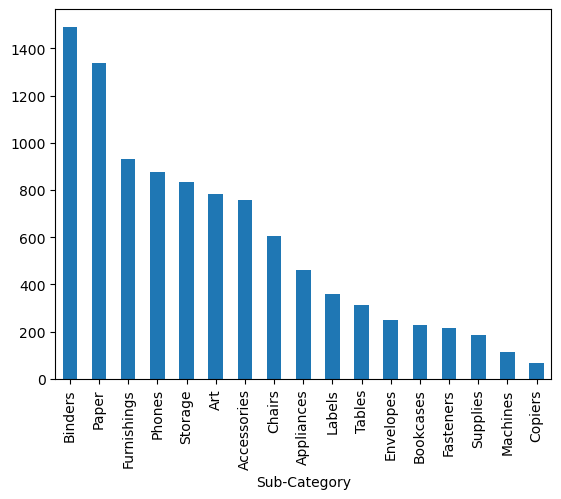

In [8]:
# Визуализация
data['Sub-Category'].value_counts().plot(kind='bar')

## Б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

In [9]:
# Определяем последнюю дату в датафрейме
last_date = data['Order Date'].max()

# Отсчитываем два года от последней даты
two_years = last_date - pd.DateOffset(years=2)

# Фильтруем данные за последние два года от последней даты
filtered_two_years = data[data['Order Date'] >= two_years]


In [10]:
# Сортировка групп по убыванию
filtered_two_years['Sub-Category'].value_counts()

Sub-Category
Binders        907
Paper          810
Furnishings    558
Phones         511
Storage        492
Art            458
Accessories    450
Chairs         348
Appliances     274
Labels         208
Tables         189
Envelopes      131
Bookcases      130
Fasteners      122
Supplies       118
Machines        66
Copiers         36
Name: count, dtype: int64

<Axes: xlabel='Sub-Category'>

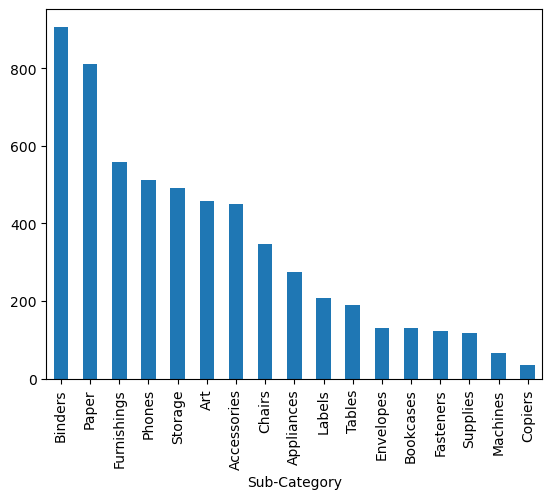

In [11]:
# Визуализация
filtered_two_years['Sub-Category'].value_counts().plot(kind='bar')

## В) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [12]:
# Отсчитываем год от последней даты
one_year = last_date - pd.DateOffset(years=1)

# Фильтруем данные за последний год от последней даты
filtered_one_year = data[data['Order Date'] >= one_year]

In [13]:
# Сортировка групп по убыванию
filtered_one_year['Sub-Category'].value_counts()

Sub-Category
Binders        496
Paper          454
Furnishings    310
Phones         291
Storage        283
Art            282
Accessories    266
Chairs         188
Appliances     161
Labels         114
Tables         104
Bookcases       76
Envelopes       71
Fasteners       63
Supplies        59
Machines        33
Copiers         22
Name: count, dtype: int64

<Axes: xlabel='Sub-Category'>

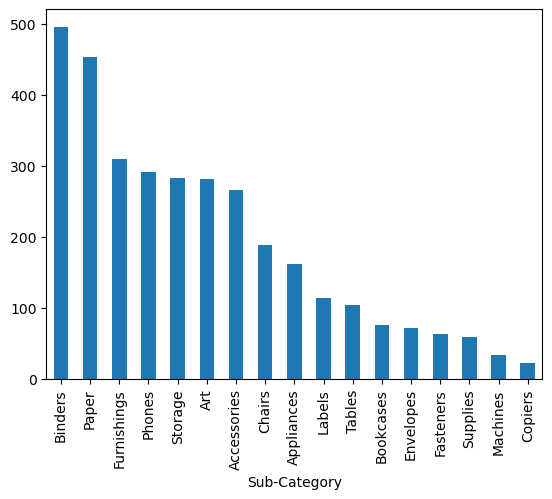

In [14]:
# Визуализация
filtered_one_year['Sub-Category'].value_counts().plot(kind='bar')

# 2) Построить boxplot («Ящик с усами») на основе продаж (Sales)
Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин)\
Используем правило 3=х сигм

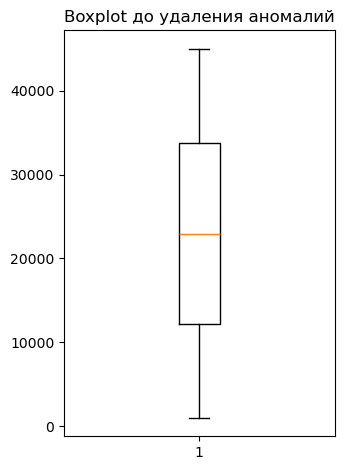

In [15]:
# "Ящик с усами" до удаления аномалий
plt.subplot(1, 2, 2)
plt.boxplot(data['Sales'])
plt.title('Boxplot до удаления аномалий')
plt.tight_layout()
plt.show()

In [16]:
# Расчет срднего и стандартного отклонения
mean = round(data['Sales'].mean(), 2)
std = round(data['Sales'].std(), 2)
display(f'Среднее значение выборки {mean}',
        f'Стандартное отклонение выборки {std}')

'Среднее значение выборки 22921.76'

'Стандартное отклонение выборки 12602.0'

In [17]:
# Удаляем значения, выходящие за пределы трех сигм
data_filtered = data[(data['Sales'] >= mean - 3*std) & (data['Sales'] <= mean + 3*std)]

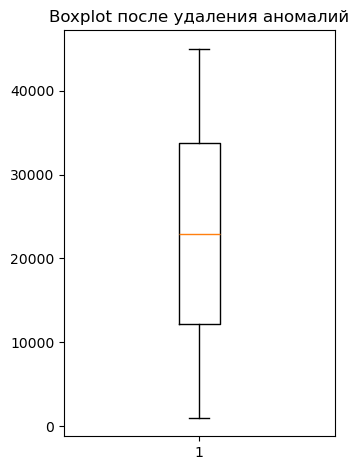

In [18]:
# "Ящик с усами" после удаления аномалий
plt.subplot(1, 2, 2)
plt.boxplot(data_filtered['Sales'])
plt.title('Boxplot после удаления аномалий')
plt.tight_layout()
plt.show()

## Вывод
В выборке наблюдается значительный разброс данных, и она не сосредоточена близко к среднему значению\
В связи с чем, далее будем использовать "фильтрованные" данные

# 3) Необходимо разбить все покупки на энное количество групп “Sale_group”
(Допустим маленькие продажи, средние и высокие) на основе Sales\
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group)\
Выделить наиболее «прибыльную» группу.

In [19]:
# Разделим столбец 'Sales' на три группы - маленькие, средние и высокие продажи
data_filtered['Sale_group'] = pd.qcut(data_filtered['Sales'], q=3, labels=['Low', 'Medium', 'High'])

In [20]:
# Сгруппируем данные по 'Region' и 'Sale_group'
grouped_data = data_filtered.groupby(['Region', 'Sale_group']).agg({'Sales': ['sum', 'mean', 'count']}).reset_index()

C:\Users\feras\AppData\Local\Temp\ipykernel_42664\459495047.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data_filtered.groupby(['Region', 'Sale_group']).agg({'Sales': ['sum', 'mean', 'count']}).reset_index()


In [21]:
# Переименуем столбцы для удобства
grouped_data.columns = ['Region', 'Sale_group', 'Total_Sales', 'Average_Sales', 'Number_of_Orders']

In [22]:
# Найдем наиболее прибыльную группу для каждого региона
display(grouped_data.loc[grouped_data.groupby('Region')['Total_Sales'].idxmax()].sort_values(by='Total_Sales', ascending=False))

,Region,Sale_group,Total_Sales,Average_Sales,Number_of_Orders
5,Калиниград,High,37904374.03,37566.277532,1009
2,Владивосток,High,35812235.43,37460.497312,956
11,Урал,High,28258324.20,37280.111082,758
8,Москва,High,20379222.91,37461.806820,544


In [23]:
# Найдем наиболее продаваемую группу для каждого региона
display(grouped_data.loc[grouped_data.groupby('Region')['Number_of_Orders'].idxmax()].sort_values(by='Number_of_Orders', ascending=False))

,Region,Sale_group,Total_Sales,Average_Sales,Number_of_Orders
4,Калиниград,Medium,2.515241e+07,23012.267795,1093
2,Владивосток,High,3.581224e+07,37460.497312,956
9,Урал,Low,6.419256e+06,8380.229930,766
8,Москва,High,2.037922e+07,37461.806820,544


In [24]:
# Выводим результаты
display("Сгруппированные данные:")
display(grouped_data.sort_values(by='Total_Sales', ascending=False))

'Сгруппированные данные:'

,Region,Sale_group,Total_Sales,Average_Sales,Number_of_Orders
5,Калиниград,High,3.790437e+07,37566.277532,1009
2,Владивосток,High,3.581224e+07,37460.497312,956
11,Урал,High,2.825832e+07,37280.111082,758
4,Калиниград,Medium,2.515241e+07,23012.267795,1093
8,Москва,High,2.037922e+07,37461.806820,544
1,Владивосток,Medium,2.030969e+07,22974.767613,884
10,Урал,Medium,1.718101e+07,22816.742855,753
7,Москва,Medium,1.225589e+07,22865.475168,536
3,Калиниград,Low,8.873517e+06,8548.667623,1038
0,Владивосток,Low,7.830757e+06,8286.515222,945


## Вывод
Самым прибыльним регионом является Калиниград в сегменте High с выручкой в 37904374.03 и кол-вом продаж в 1009\
Он же является рекордсменом по кол-вам продаж, но уже в сегменте Medium с выручкой в 2.515241e+07 и кол-вом продаж в 1093\
\
А если говорить о самых продаваемых группах товаров по регионам, то картина следующая:\
Калиниград - Medium\
Владивосток - High\
Урал - Low\
Москва - High